In [46]:
import pandas as pd


In [2]:
# 读取CSV文件
df1 = pd.read_csv('day01.csv')
df2 = pd.read_csv('app_class.csv')

# 比对两列数据
merged_df = df1.merge(df2, on='appid', how='inner')

# 保留相同的数据
merged_df.to_csv('数据整合.csv', index=False)
merged_df

Unnamed: 0_x                               uid  appid app_type   
0                   1  BB1657CFD3B4B7208674BEB7D26014B2   4803      usr  \
1                   2  BB1657CFD3B4B7208674BEB7D26014B2   4803      usr   
2                   3  BB1657CFD3B4B7208674BEB7D26014B2   4803      usr   
3                   4  BB1657CFD3B4B7208674BEB7D26014B2   4803      usr   
4                   6  BB1657CFD3B4B7208674BEB7D26014B2   4803      usr   
...               ...                               ...    ...      ...   
3178323       5849374  364F3866C9021795119DB8DC1D697EED   4214      usr   
3178324       5849376  364F3866C9021795119DB8DC1D697EED   4214      usr   
3178325       5849377  364F3866C9021795119DB8DC1D697EED   4214      usr   
3178326       5849378  364F3866C9021795119DB8DC1D697EED   4214      usr   
3178327       5858944  28CED6E6CB0287FECF1808B337ECF8FA  20261      sys   

         start_day start_time  end_day  end_time  duration  up_flow   
0                1   13:40:45        1  13:44:41       235     3304  \
1                1   13:47:10        1  13:47:22        12      398   
2                1   13:47:23        1  13:50:10       167    63044   
3                1   14:19:25        1  14:19:42        17        0   
4                1   14:20:20        1  14:24:55       275   577961   
...            ...        ...      ...       ...       ...      ...   
3178323          1   16:28:18        1  16:32:53       274    43778   
3178324          1   16:33:15        1  16:33:45        29     3199   
3178325          1   16:34:54        1  16:54:28      1174   114346   
3178326          1   16:54:30        1  17:07:26       775    68919   
3178327          1   19:08:19        1  19:08:22         3        0   

         down_flow  Unnamed: 0_y app_class  
0             5851            15         a  
1              268            15         a  
2            34622            15         a  
3                0            15         a  
4            78443            15         a  
...            ...           ...       ...  
3178323       7973          2887         t  
3178324        485          2887         t  
3178325      14571          2887         t  
3178326       7990          2887         t  
3178327          0          1893         l  

[3178328 rows x 13 columns]

In [3]:
# 选择需要保留的列
merged_df = merged_df[['uid', 'app_type','start_day','start_time','end_day','end_time','duration','up_flow','down_flow','app_class']]
merged_df.to_csv('数据整合')

In [4]:
# 读取CSV文件
df = pd.read_csv('数据整合.csv')

# 创建映射字典
mapping = {'usr': 0, 'sys': 1}

# 将一列数据进行转换
df['app_type'] = df['app_type'].map(mapping)

# 删除其他不需要的数据
df = df.dropna(subset=['app_type'])


# 保存结果到新的CSV文件
df.to_csv('数据整合.csv', index=False)
df

Unnamed: 0_x                               uid  appid  app_type   
0                   1  BB1657CFD3B4B7208674BEB7D26014B2   4803       0.0  \
1                   2  BB1657CFD3B4B7208674BEB7D26014B2   4803       0.0   
2                   3  BB1657CFD3B4B7208674BEB7D26014B2   4803       0.0   
3                   4  BB1657CFD3B4B7208674BEB7D26014B2   4803       0.0   
4                   6  BB1657CFD3B4B7208674BEB7D26014B2   4803       0.0   
...               ...                               ...    ...       ...   
3178323       5849374  364F3866C9021795119DB8DC1D697EED   4214       0.0   
3178324       5849376  364F3866C9021795119DB8DC1D697EED   4214       0.0   
3178325       5849377  364F3866C9021795119DB8DC1D697EED   4214       0.0   
3178326       5849378  364F3866C9021795119DB8DC1D697EED   4214       0.0   
3178327       5858944  28CED6E6CB0287FECF1808B337ECF8FA  20261       1.0   

         start_day start_time  end_day  end_time  duration  up_flow   
0                1   13:40:45        1  13:44:41       235     3304  \
1                1   13:47:10        1  13:47:22        12      398   
2                1   13:47:23        1  13:50:10       167    63044   
3                1   14:19:25        1  14:19:42        17        0   
4                1   14:20:20        1  14:24:55       275   577961   
...            ...        ...      ...       ...       ...      ...   
3178323          1   16:28:18        1  16:32:53       274    43778   
3178324          1   16:33:15        1  16:33:45        29     3199   
3178325          1   16:34:54        1  16:54:28      1174   114346   
3178326          1   16:54:30        1  17:07:26       775    68919   
3178327          1   19:08:19        1  19:08:22         3        0   

         down_flow  Unnamed: 0_y app_class  
0             5851            15         a  
1              268            15         a  
2            34622            15         a  
3                0            15         a  
4            78443            15         a  
...            ...           ...       ...  
3178323       7973          2887         t  
3178324        485          2887         t  
3178325      14571          2887         t  
3178326       7990          2887         t  
3178327          0          1893         l  

[3178195 rows x 13 columns]

In [5]:
from datetime import datetime
#读取CSV数据,转换时间列为datetime格式
df=pd.read_csv('数据整合.csv')
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
# 自定义函数根据peak hours对时间进行分段
def time_period(t):
    if (t >= datetime(2023, 7, 18, 7, 0, 0) and
        t <= datetime(2023, 7, 18, 11, 59, 59)):
        return 'morning'
    elif (t >= datetime(2023, 7, 18, 12, 0, 0) and
          t <= datetime(2023, 7, 18, 17, 59, 59)):
        return 'noon'
    elif (t >= datetime(2023, 7, 18, 18, 0, 0) and
          t <= datetime(2023, 7, 18, 21, 59, 59)):
        return 'evening'
    else:
        return 'late_night'
#添加新的时段列

df['start_period'] = df['start_time'].apply(time_period)
df['end_period'] = df['end_time'].apply(time_period)

df.to_csv('数据整合.csv', index=False)

C:\Users\86137\AppData\Local\Temp\ipykernel_3832\3788573855.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_time'] = pd.to_datetime(df['start_time'])
C:\Users\86137\AppData\Local\Temp\ipykernel_3832\3788573855.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_time'] = pd.to_datetime(df['end_time'])


In [6]:
df3=pd.read_csv('数据整合.csv')
df3['start_time'] = pd.to_datetime(df3['start_time'])
df3['end_time'] = pd.to_datetime(df3['end_time'])
start_hour_seconds = df3['start_time'].dt.hour * 3600
start_minute_seconds = df3['start_time'].dt.minute * 60
start_seconds = df3['start_time'].dt.second

end_hour_seconds = df3['end_time'].dt.hour * 3600
end_minute_seconds = df3['end_time'].dt.minute * 60
end_seconds = df3['end_time'].dt.second

start_total_seconds = df3['start_day'] * 24 * 3600 + start_hour_seconds + start_minute_seconds + start_seconds
end_total_seconds = df3['end_day'] * 24 * 3600 + end_hour_seconds + end_minute_seconds + end_seconds

df3['real_duration'] = end_total_seconds - start_total_seconds

# 将real_duration赋值给duration列
df3['duration'] = df3['real_duration']
df3 = df3[['uid', 'app_type','start_day','start_period','end_day','end_period','duration','up_flow','down_flow','app_class']]
df3.to_csv('数据整合.csv', index=False)

In [36]:
df3 = df3[['uid', 'app_type','start_day','start_period','end_day','end_period','duration','up_flow','down_flow','app_class']]
df3.to_csv('数据整合.csv', index=False)

In [7]:
# 读取CSV文件
data1 = pd.read_csv('数据整合.csv')

# 计算两列数据的差值，将结果作为新的一列
data1['diff'] = data1['end_day'] - data1['start_day']

# 将更新后的数据写入CSV文件
data1.to_csv('数据整合.csv', index=False)

In [9]:
# 读取CSV文件
df = pd.read_csv('数据整合.csv')

# 创建映射字典
day01.csv

# 将一列数据进行转换
df['app_class'] = df['app_class'].map(mapping)


# 保存结果到新的CSV文件
df.to_csv('数据整合.csv', index=False)


In [11]:
df = pd.read_csv('数据整合.csv')

# 创建映射字典
mapping = {'morning':1,'noon':2,'evening':3,'late_night':4}

# 将一列数据进行转换
df['start_period'] = df['start_period'].map(mapping)
df['end_period'] = df['end_period'].map(mapping)

# 保存结果到新的CSV文件
df.to_csv('数据整合.csv', index=False)

In [15]:
# 读取CSV文件
df= pd.read_csv('数据整合.csv')

# 遍历一列数据并进行条件过滤
df_filtered = df[df['duration'] >= 5]

# 保存过滤后的结果到新的CSV文件
df_filtered.to_csv('数据整合.csv', index=False)
df_filtered

uid  app_type  start_day  start_period   
0        BB1657CFD3B4B7208674BEB7D26014B2       0.0          1             2  \
1        BB1657CFD3B4B7208674BEB7D26014B2       0.0          1             2   
2        BB1657CFD3B4B7208674BEB7D26014B2       0.0          1             2   
3        BB1657CFD3B4B7208674BEB7D26014B2       0.0          1             2   
4        BB1657CFD3B4B7208674BEB7D26014B2       0.0          1             2   
...                                   ...       ...        ...           ...   
3178189  364F3866C9021795119DB8DC1D697EED       0.0          1             2   
3178190  364F3866C9021795119DB8DC1D697EED       0.0          1             2   
3178191  364F3866C9021795119DB8DC1D697EED       0.0          1             2   
3178192  364F3866C9021795119DB8DC1D697EED       0.0          1             2   
3178193  364F3866C9021795119DB8DC1D697EED       0.0          1             2   

         end_day  end_period  duration  up_flow  down_flow  app_class  diff  
0              1           2       236     3304       5851          1     0  
1              1           2        12      398        268          1     0  
2              1           2       167    63044      34622          1     0  
3              1           2        17        0          0          1     0  
4              1           2       275   577961      78443          1     0  
...          ...         ...       ...      ...        ...        ...   ...  
3178189        1           2       776    68919       7990         20     0  
3178190        1           2       275    43778       7973         20     0  
3178191        1           2        30     3199        485         20     0  
3178192        1           2      1174   114346      14571         20     0  
3178193        1           2       776    68919       7990         20     0  

[2481307 rows x 11 columns]

In [18]:
df= pd.read_csv('数据整合.csv')
# 计算两列数据的和，将结果作为新的一列
df['flow'] = df['up_flow'] + df['down_flow']

# 将更新后的数据写入CSV文件
df.to_csv('数据整合.csv', index=False)

In [38]:
# 读取大型CSV文件，使用chunksize参数分块读取

df_chunks = pd.read_csv('数据整合.csv')

# 创建一个空的DataFrame用于存储处理后的数据
processed_data = pd.DataFrame()

# 遍历每个数据块
 # 去重并将重复值所在行的其他列数据整合到一行
chunk_processed = df_chunks.groupby('uid').agg({
    'app_type': lambda x:list(x),
    'start_day': lambda x:list(x),
    'start_period': lambda x:list(x),
    'end_day': lambda x:list(x),
    'end_period': lambda x:list(x),
    'duration': lambda x:list(x),
    'up_flow': lambda x:list(x),
    'down_flow': lambda x:list(x),
    'app_class': lambda x:list(x),
    'diff': lambda x:list(x),
    'flow': lambda x:list(x),

        # 添加其他需要整合的列
    }).reset_index()

# 将处理后的数据块添加到结果中
processed_data = pd.concat([processed_data, chunk_processed])

# 将处理后的数据保存为新的CSV文件
processed_data.to_csv('数据整合1.csv', index=False)

In [39]:
from ast import literal_eval
from collections import Counter

# 读取CSV文件
df = pd.read_csv('数据整合1.csv')

# 将字符串转换为列表对象
df['app_class'] = df['app_class'].apply(literal_eval)

# 获取每行列表中出现次数最多的整数并添加为新列
df['most_frequent_app'] = df['app_class'].apply(lambda x: Counter(x).most_common(1)[0][0])
df.to_csv('数据整合1.csv', index=False)

In [41]:
df=pd.read_csv('数据整合.csv')
df.to_csv('数据整合1.csv', index=False)

In [40]:
df = pd.read_csv('数据整合1.csv')

# 计算每行列表内的数字个数并创建新的一列

df['frequency of use'] = df['start_day'].apply(lambda x: len(eval(x)))
df.to_csv('数据整合1.csv', index=False)

uid   
0      0000348F61881026FE0036840F25309F  \
1      00028CD7D203AF88C4FE4D0A83A0016E   
2      000343EFFAAF27FE66CAD41434814C71   
3      00046AA87AAF8C9971F99597ED7D90DF   
4      00050A1B07C0BD248726E0385D04D657   
...                                 ...   
34905  FFF62C1EEF706DF3174EF676391E15C1   
34906  FFF6689AA115DFBAA4A6D66928F93971   
34907  FFF82C898EE523DA1F4137097FECCB20   
34908  FFFA25131B53BDF8B855AB4D473E29C2   
34909  FFFBECC89A7D04B8F3AE1ABBDA0179F5   

                                                app_type   
0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                  ...   
34905           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
34906  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
34907  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
34908  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
34909  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               start_day   
0      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  \
1      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3                      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
4                         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
...                                                  ...   
34905                           [1, 1, 1, 1, 1, 1, 1, 1]   
34906  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34907  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34908  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34909  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                            start_period   
0      [4, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, ...  \
1      [2, 1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 1, 1, 2, 2, ...   
2                [2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2]   
3                      [4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1]   
4                         [1, 4, 1, 1, 4, 4, 1, 1, 2, 2]   
...                                                  ...   
34905                           [4, 4, 1, 1, 1, 1, 1, 1]   
34906  [1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, ...   
34907  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...   
34908  [4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, ...   
34909  [1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   

                                                 end_day   
0      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  \
1      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3                      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
4                         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
...                                                  ...   
34905                           [1, 1, 1, 1, 1, 1, 1, 1]   
34906  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34907  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34908  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34909  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                              end_period   
0      [4, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, ...  \
1      [2, 1, 1, 2, 2, 2, 4, 4, 4, 4, 4, 1, 1, 2, 2, ...   
2                [2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2]   
3                      [4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1]   
4                         [1, 4, 1, 1, 4, 4, 1, 1, 2, 2]   
...                                                  ...   
34905                           [4, 4, 1, 1, 1, 1, 1, 1]   
34906  [1, 1, 1, 2, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, ...   
34907  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...   
34908  [4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [42]:

# 读取CSV文件
df = pd.read_csv('数据整合1.csv')

# 计算每行列表内的数字加起来的和并创建新的一列
df['total_usage_time'] = df['duration'].apply(lambda x: sum(eval(x)))
df['total_flow'] = df['flow'].apply(lambda x: sum(eval(x)))
# 保存修改后的数据为新的CSV文件
df

uid   
0      0000348F61881026FE0036840F25309F  \
1      00028CD7D203AF88C4FE4D0A83A0016E   
2      000343EFFAAF27FE66CAD41434814C71   
3      00046AA87AAF8C9971F99597ED7D90DF   
4      00050A1B07C0BD248726E0385D04D657   
...                                 ...   
34905  FFF62C1EEF706DF3174EF676391E15C1   
34906  FFF6689AA115DFBAA4A6D66928F93971   
34907  FFF82C898EE523DA1F4137097FECCB20   
34908  FFFA25131B53BDF8B855AB4D473E29C2   
34909  FFFBECC89A7D04B8F3AE1ABBDA0179F5   

                                                app_type   
0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                  ...   
34905           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
34906  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
34907  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
34908  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
34909  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               start_day   
0      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  \
1      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3                      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
4                         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
...                                                  ...   
34905                           [1, 1, 1, 1, 1, 1, 1, 1]   
34906  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34907  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34908  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34909  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                            start_period   
0      [4, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, ...  \
1      [2, 1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 1, 1, 2, 2, ...   
2                [2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2]   
3                      [4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1]   
4                         [1, 4, 1, 1, 4, 4, 1, 1, 2, 2]   
...                                                  ...   
34905                           [4, 4, 1, 1, 1, 1, 1, 1]   
34906  [1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, ...   
34907  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...   
34908  [4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, ...   
34909  [1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   

                                                 end_day   
0      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  \
1      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3                      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
4                         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
...                                                  ...   
34905                           [1, 1, 1, 1, 1, 1, 1, 1]   
34906  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34907  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34908  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34909  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                              end_period   
0      [4, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, ...  \
1      [2, 1, 1, 2, 2, 2, 4, 4, 4, 4, 4, 1, 1, 2, 2, ...   
2                [2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2]   
3                      [4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1]   
4                         [1, 4, 1, 1, 4, 4, 1, 1, 2, 2]   
...                                                  ...   
34905                           [4, 4, 1, 1, 1, 1, 1, 1]   
34906  [1, 1, 1, 2, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, ...   
34907  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...   
34908  [4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [52]:
df.to_csv('数据整合1.csv')

In [51]:
df = pd.read_csv('数据整合1.csv')

# 计算每行列表内的数字的平均值并创建新的一列
df['avg_app_type'] = df['app_type'].apply(lambda x: sum(eval(x))/len(eval(x)))
df['avg_start_period'] = df['start_period'].apply(lambda x: sum(eval(x))/len(eval(x)))
df['avg_end_period'] = df['end_period'].apply(lambda x: sum(eval(x))/len(eval(x)))
df['avg_duration'] = df['duration'].apply(lambda x: sum(eval(x))/len(eval(x)))
df['avg_up_flow'] = df['up_flow'].apply(lambda x: sum(eval(x))/len(eval(x)))
df['avg_flow'] = df['flow'].apply(lambda x: sum(eval(x))/len(eval(x)))
df['avg_down_flow'] = df['down_flow'].apply(lambda x: sum(eval(x))/len(eval(x)))
df['avg_diff'] = df['diff'].apply(lambda x: sum(eval(x))/len(eval(x)))

# 保存修改后的数据为新的CSV文件
df

Unnamed: 0                               uid   
0               0  0000348F61881026FE0036840F25309F  \
1               1  00028CD7D203AF88C4FE4D0A83A0016E   
2               2  000343EFFAAF27FE66CAD41434814C71   
3               3  00046AA87AAF8C9971F99597ED7D90DF   
4               4  00050A1B07C0BD248726E0385D04D657   
...           ...                               ...   
34905       34905  FFF62C1EEF706DF3174EF676391E15C1   
34906       34906  FFF6689AA115DFBAA4A6D66928F93971   
34907       34907  FFF82C898EE523DA1F4137097FECCB20   
34908       34908  FFFA25131B53BDF8B855AB4D473E29C2   
34909       34909  FFFBECC89A7D04B8F3AE1ABBDA0179F5   

                                                app_type   
0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                  ...   
34905           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
34906  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
34907  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
34908  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
34909  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               start_day   
0      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  \
1      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3                      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
4                         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
...                                                  ...   
34905                           [1, 1, 1, 1, 1, 1, 1, 1]   
34906  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34907  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34908  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34909  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                            start_period   
0      [4, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, ...  \
1      [2, 1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 1, 1, 2, 2, ...   
2                [2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2]   
3                      [4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1]   
4                         [1, 4, 1, 1, 4, 4, 1, 1, 2, 2]   
...                                                  ...   
34905                           [4, 4, 1, 1, 1, 1, 1, 1]   
34906  [1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, ...   
34907  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...   
34908  [4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, ...   
34909  [1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   

                                                 end_day   
0      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  \
1      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3                      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
4                         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
...                                                  ...   
34905                           [1, 1, 1, 1, 1, 1, 1, 1]   
34906  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34907  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34908  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
34909  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                              end_period   
0      [4, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, ...  \
1      [2, 1, 1, 2, 2, 2, 4, 4, 4, 4, 4, 1, 1, 2, 2, ...   
2                [2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2]   
3                      [4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1]   
4                         [1, 4, 1, 1, 4, 4, 1, 1, 2, 2]   
...                                                  ...   
34905                           [4, 4, 1, 

In [54]:
#标准化
from sklearn.preprocessing import StandardScaler

# 读取CSV文件
df = pd.read_csv('数据整合1.csv')

# 选择要标准化的数据列
columns_to_normalize = ['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period','avg_duration', 'avg_up_flow', 'avg_down_flow', 'avg_flow', 'avg_diff']

# 创建StandardScaler对象
scaler = StandardScaler()

# 对选择的数据列进行标准化
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# 保存结果到新的CSV文件
df.to_csv('day01标准归一.csv', index=False)
# 读取CSV文件
df = pd.read_csv('day01标准归一.csv')


In [55]:
# 归一
from sklearn.preprocessing import MinMaxScaler

# 读取CSV文件

df = pd.read_csv('day01标准归一.csv')
# 选择需要归一化的数值列
numerical_columns = ['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period','avg_duration', 'avg_up_flow', 'avg_down_flow', 'avg_flow', 'avg_diff']

# 创建MinMaxScaler对象
scaler = MinMaxScaler()

# 将数据进行归一化
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.to_csv('day01标准归一.csv', index=False)

In [132]:
from sklearn.cluster import KMeans

# 读取CSV文件
df = pd.read_csv('day01标准归一.csv')
df=df[['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']]

# 创建 KMeans 模型，设置簇数为5
kmeans = KMeans(n_clusters=5, random_state=0)

# 进行聚类
kmeans.fit(df)

# 获取每个数据点所属的簇
labels = kmeans.labels_

# 将簇标签添加到数据框中
df['cluster_label'] = labels

# 保存修改后的数据为新的CSV文件
df.to_csv('day01_kmeans.csv')

D:\Python\3.10.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


D:\Python\3.10.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Python\3.10.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Python\3.10.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Python\3.10.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Python\3.10.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The de

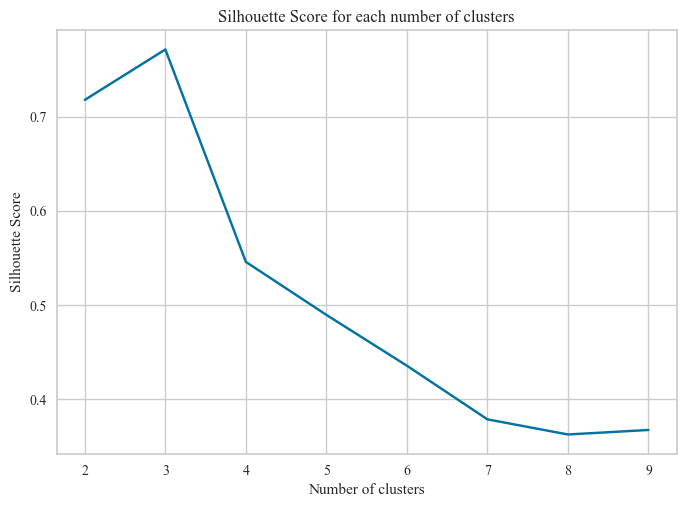

In [108]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt




# 创建一个列表来保存每个簇数对应的轮廓系数
silhouette_scores = []

# 设置簇数的范围
cluster_range = range(2, 10)

# 计算每个簇数对应的轮廓系数
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(df)
    labels = kmeans.labels_
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

# 绘制轮廓系数图
plt.plot(cluster_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for each number of clusters')
plt.savefig('轮廓系数图.pdf')

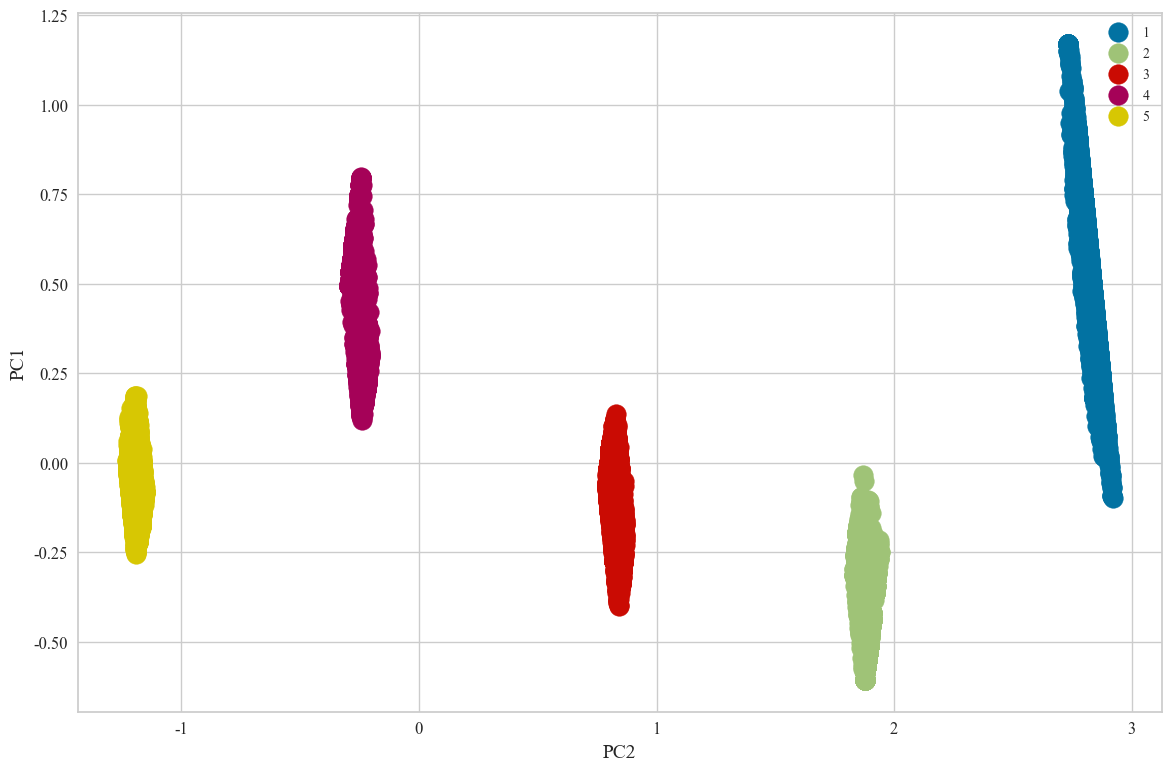

In [133]:
from sklearn.decomposition import PCA

data=pd.read_csv('day01_kmeans.csv')
y_pred=data['cluster_label']

pca = PCA(n_components=2)
DataNewPCA = pca.fit_transform(df)
x0, y0= [], []
x1, y1= [], []
x2, y2= [], []
x3, y3= [], []
x4, y4= [], []

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

for index, value in enumerate(y_pred):
    if value == 0:
        x0.append(DataNewPCA[index][0])
        y0.append(DataNewPCA[index][1])
    elif value == 1:
        x1.append(DataNewPCA[index][0])
        y1.append(DataNewPCA[index][1])
    elif value == 2:
        x2.append(DataNewPCA[index][0])
        y2.append(DataNewPCA[index][1])
    elif value == 3:
        x3.append(DataNewPCA[index][0])
        y3.append(DataNewPCA[index][1])
    elif value == 4:
        x4.append(DataNewPCA[index][0])
        y4.append(DataNewPCA[index][1])

plt.figure(figsize=(12, 8))

# #定义坐标轴
k = 200
plt.scatter(x0, y0,s=k)
plt.scatter(x1, y1,s=k)
plt.scatter(x2, y2,s=k)
plt.scatter(x3, y3,s=k)
plt.scatter(x4, y4,s=k)
plt.legend(['1','2','3','4','5'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('PC2',fontsize=14)
plt.ylabel('PC1',fontsize=14)
plt.tight_layout()
plt.savefig('聚类散点图kmeans.pdf')

D:\Python\3.10.8\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

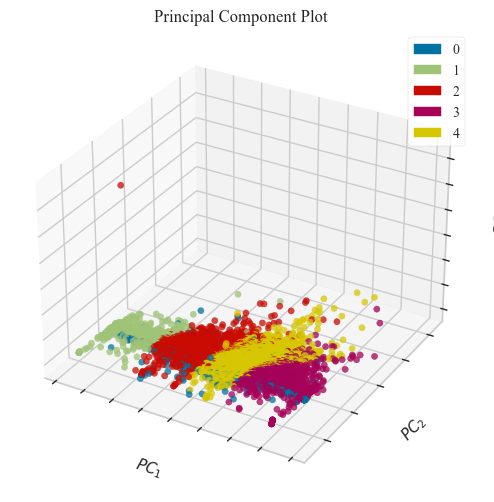

In [135]:
from yellowbrick.features import PCA
import matplotlib.pyplot as plt
classes=['0','1','2','3','4']
features=['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(10,6))
X=data[features]
y=data['cluster_label']
visualizer = PCA(scale=True, projection=3, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show(outpath="三维聚类散点图kmeans.pdf")

In [89]:
#DBSCAN
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 获取需要聚类的列数据
X = df

# 使用 DBSCAN 进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X)

# 打印聚类结果
df['label'] = y_pred
df.to_csv('day01_DBSCAN.csv')


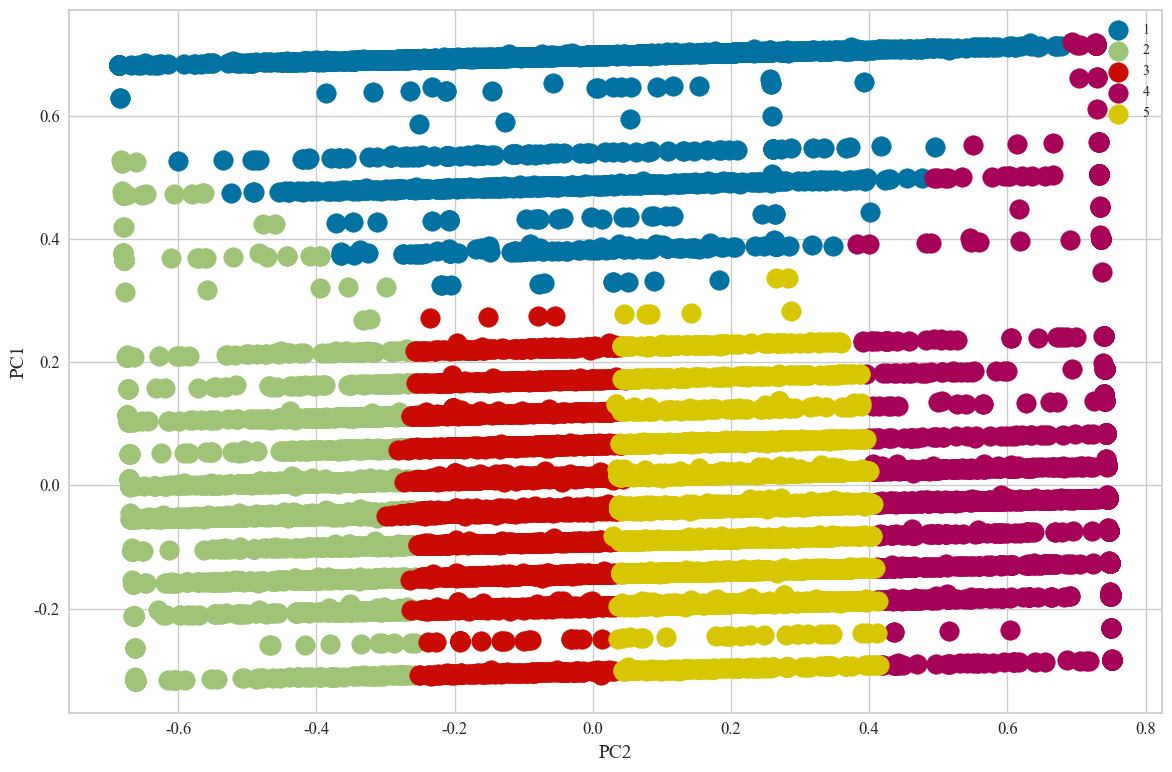

In [91]:
#DBSCAN散点图
from sklearn.decomposition import PCA
df = pd.read_csv('day01标准归一.csv')
df=df[['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']]


pca = PCA(n_components=2)
DataNewPCA = pca.fit_transform(df)
x0, y0= [], []
x1, y1= [], []
x2, y2= [], []
x3, y3= [], []
x4, y4= [], []

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

for index, value in enumerate(y_pred):
    if value == 0:
        x0.append(DataNewPCA[index][0])
        y0.append(DataNewPCA[index][1])
    elif value == 1:
        x1.append(DataNewPCA[index][0])
        y1.append(DataNewPCA[index][1])
    elif value == 2:
        x2.append(DataNewPCA[index][0])
        y2.append(DataNewPCA[index][1])
    elif value == 3:
        x3.append(DataNewPCA[index][0])
        y3.append(DataNewPCA[index][1])
    elif value == 4:
        x4.append(DataNewPCA[index][0])
        y4.append(DataNewPCA[index][1])

plt.figure(figsize=(12, 8))

# #定义坐标轴
k = 200
plt.scatter(x0, y0,s=k)
plt.scatter(x1, y1,s=k)
plt.scatter(x2, y2,s=k)
plt.scatter(x3, y3,s=k)
plt.scatter(x4, y4,s=k)
plt.legend(['1','2','3','4','5','6'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('PC2',fontsize=14)
plt.ylabel('PC1',fontsize=14)
plt.tight_layout()
plt.savefig('聚类散点图DBSCAN.pdf')

D:\Python\3.10.8\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

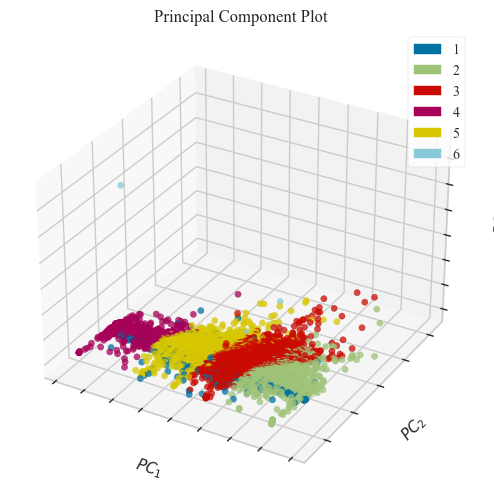

In [99]:
from yellowbrick.features import PCA
import matplotlib.pyplot as plt
classes=['1','2','3','4','5','6']
features=['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(10,6))
X=data[features]
y=y_pred
visualizer = PCA(scale=True, projection=3, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show(outpath="三维聚类散点图DBSCAN.pdf")

In [7]:
import pandas as pd
from sklearn.cluster import OPTICS

# 读取CSV文件
df = pd.read_csv('day01标准归一.csv')
df=df[['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']]

data=pd.read_csv('day01_optics.csv')
# 提取需要聚类的特征列
X = df

# 创建OPTICS聚类模型
optics = OPTICS()

# 拟合数据
optics.fit(X)

# 获取每个数据点的聚类标签
labels = optics.labels_

# 获取核心距离
core_distances = optics.core_distances_

# 获取可达距离
reachability_distances = optics.reachability_

# 将聚类结果写回CSV文件
data['label_optics'] = labels
data.to_csv('day01_optics.csv', index=False)

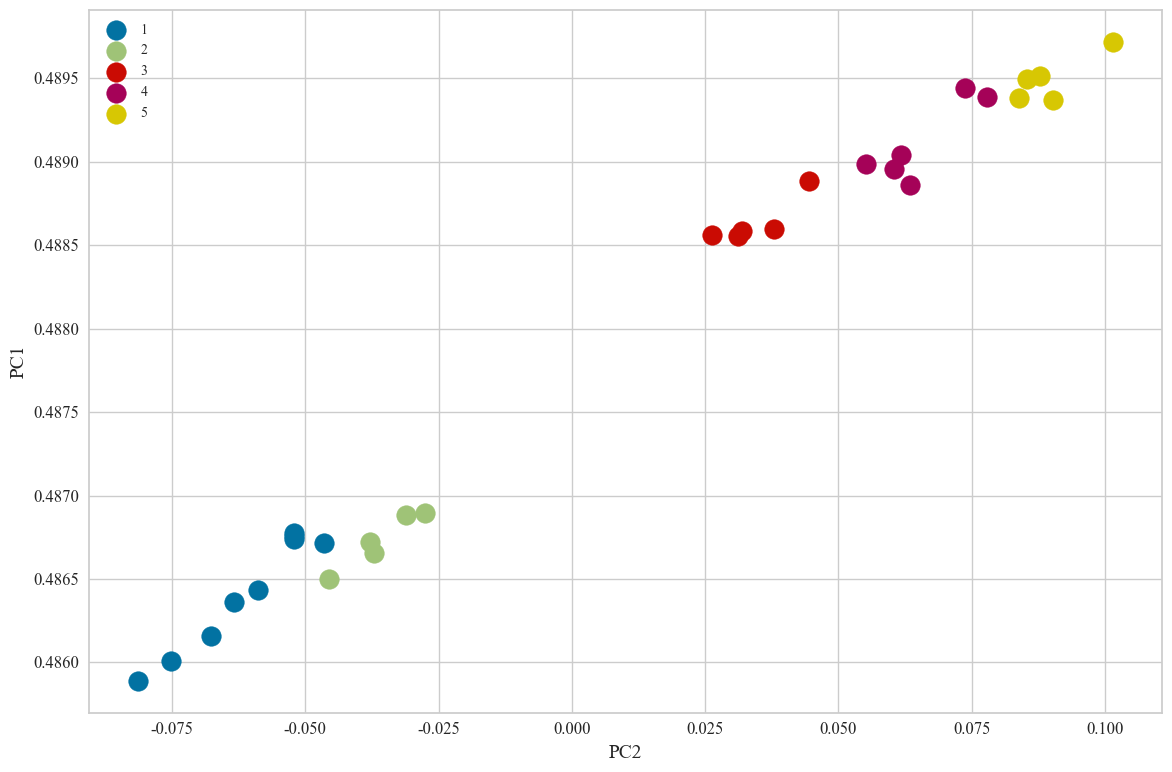

In [98]:
#DBSCAN散点图
from sklearn.decomposition import PCA
df = pd.read_csv('day01标准归一.csv')
df=df[['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']]


pca = PCA(n_components=2)
DataNewPCA = pca.fit_transform(df)
x0, y0= [], []
x1, y1= [], []
x2, y2= [], []
x3, y3= [], []
x4, y4= [], []

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

for index, value in enumerate(labels):
    if value == 0:
        x0.append(DataNewPCA[index][0])
        y0.append(DataNewPCA[index][1])
    elif value == 1:
        x1.append(DataNewPCA[index][0])
        y1.append(DataNewPCA[index][1])
    elif value == 2:
        x2.append(DataNewPCA[index][0])
        y2.append(DataNewPCA[index][1])
    elif value == 3:
        x3.append(DataNewPCA[index][0])
        y3.append(DataNewPCA[index][1])
    elif value == 4:
        x4.append(DataNewPCA[index][0])
        y4.append(DataNewPCA[index][1])

plt.figure(figsize=(12, 8))

# #定义坐标轴
k = 200
plt.scatter(x0, y0,s=k)
plt.scatter(x1, y1,s=k)
plt.scatter(x2, y2,s=k)
plt.scatter(x3, y3,s=k)
plt.scatter(x4, y4,s=k)
plt.legend(['1','2','3','4','5','6'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('PC2',fontsize=14)
plt.ylabel('PC1',fontsize=14)
plt.tight_layout()
plt.savefig('聚类散点图optics.pdf')

D:\Python\3.10.8\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

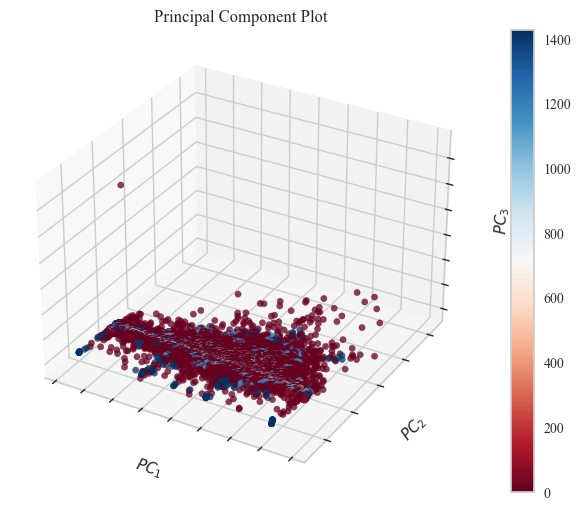

In [104]:
from yellowbrick.features import PCA
import matplotlib.pyplot as plt
classes=['0','1','2','3','4']
features=['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(10,6))
X=df[features]
y=labels
visualizer = PCA(scale=True, projection=3, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show(outpath="三维聚类散点图optics.pdf")


In [136]:
from sklearn.cluster import Birch

# 读取CSV文件
df = pd.read_csv('day01标准归一.csv')
df=df[['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']]

# 提取需要聚类的特征列
X = df

# 创建Birch聚类模型
birch = Birch(threshold=0.1, n_clusters=5)

# 拟合数据
birch.fit(X)

# 获取每个数据点的聚类标签
labels = birch.labels_

# 获取簇中心
cluster_centers = birch.subcluster_centers_

# 将聚类结果写回CSV文件
data['cluster_label'] = labels
data.to_csv('day01_birch.csv', index=False)

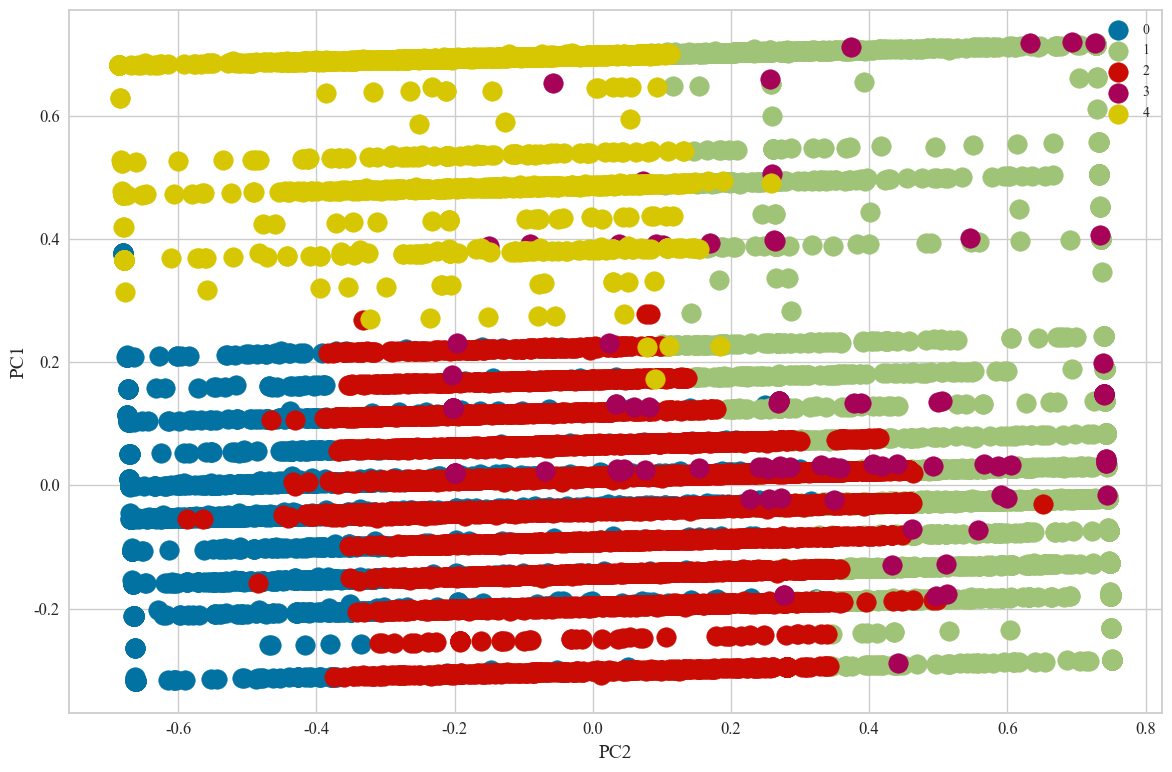

In [137]:
#DBSCAN散点图
from sklearn.decomposition import PCA
df = pd.read_csv('day01标准归一.csv')
df=df[['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']]


pca = PCA(n_components=2)
DataNewPCA = pca.fit_transform(df)
x0, y0= [], []
x1, y1= [], []
x2, y2= [], []
x3, y3= [], []
x4, y4= [], []

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

for index, value in enumerate(labels):
    if value == 0:
        x0.append(DataNewPCA[index][0])
        y0.append(DataNewPCA[index][1])
    elif value == 1:
        x1.append(DataNewPCA[index][0])
        y1.append(DataNewPCA[index][1])
    elif value == 2:
        x2.append(DataNewPCA[index][0])
        y2.append(DataNewPCA[index][1])
    elif value == 3:
        x3.append(DataNewPCA[index][0])
        y3.append(DataNewPCA[index][1])
    elif value == 4:
        x4.append(DataNewPCA[index][0])
        y4.append(DataNewPCA[index][1])

plt.figure(figsize=(12, 8))

# #定义坐标轴
k = 200
plt.scatter(x0, y0,s=k)
plt.scatter(x1, y1,s=k)
plt.scatter(x2, y2,s=k)
plt.scatter(x3, y3,s=k)
plt.scatter(x4, y4,s=k)
plt.legend(['0','1','2','3','4'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('PC2',fontsize=14)
plt.ylabel('PC1',fontsize=14)
plt.tight_layout()
plt.savefig('聚类散点图_birch.pdf')

D:\Python\3.10.8\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

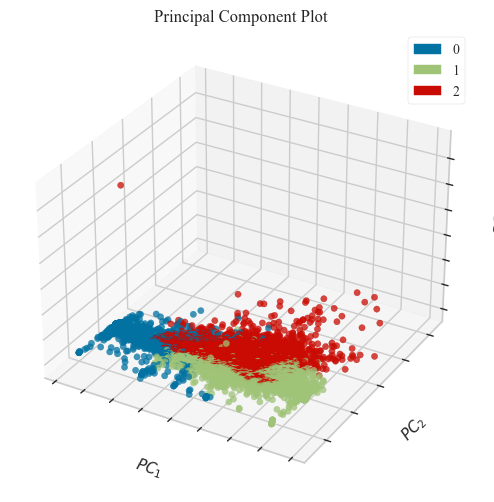

In [120]:
from yellowbrick.features import PCA
import matplotlib.pyplot as plt
classes=['0','1','2']
features=['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(10,6))
X=df[features]
y=labels
visualizer = PCA(scale=True, projection=3, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show(outpath="三维聚类散点图_birch.pdf")

In [129]:
# MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans

# 读取CSV文件
df = pd.read_csv('day01标准归一.csv')
df=df[['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']]

# 提取需要聚类的特征列
X = df

# 创建 MiniBatchKMeans 聚类模型
kmeans = MiniBatchKMeans(n_clusters=3, batch_size=100)

# 拟合数据
kmeans.fit(X)

# 获取每个数据点的聚类标签
labels = kmeans.labels_

# 获取聚类中心
cluster_centers = kmeans.cluster_centers_

# 将聚类结果写回CSV文件
data['cluster_label'] = labels
data.to_csv('day01_MiniBatchKMeans.csv', index=False)

D:\Python\3.10.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


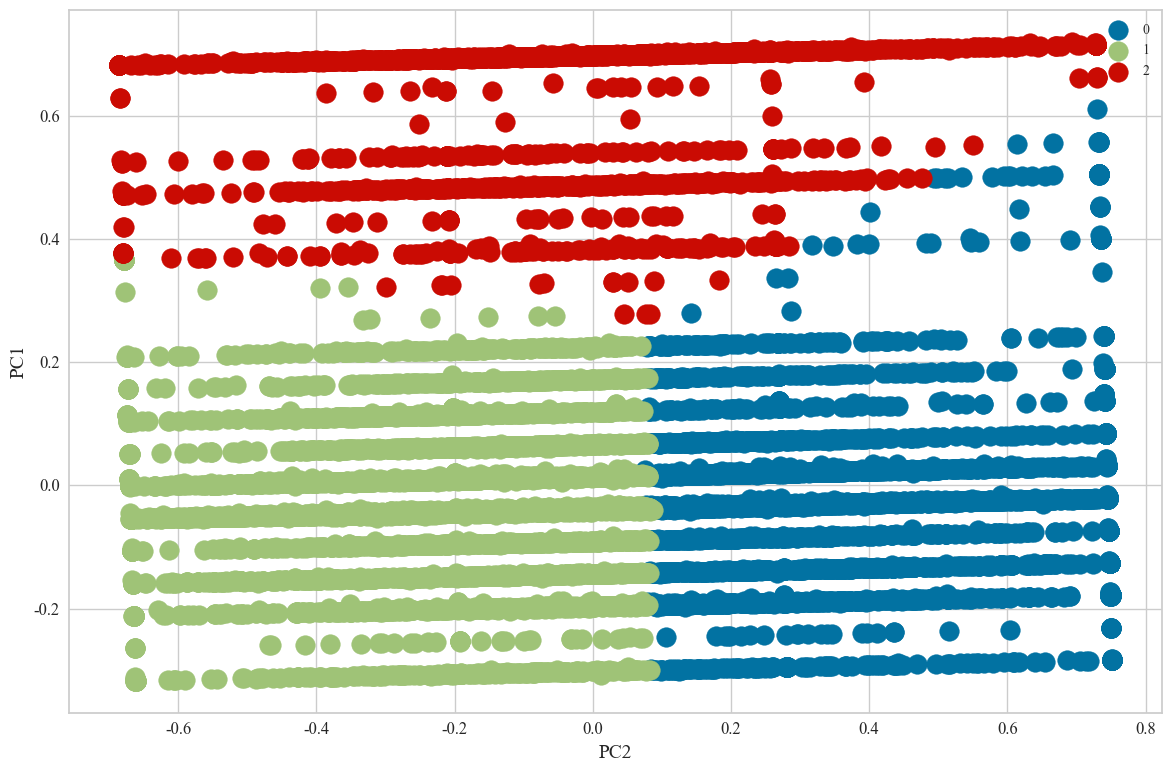

In [130]:
#MiniBatchKMeans散点图
from sklearn.decomposition import PCA
df = pd.read_csv('day01标准归一.csv')
df=df[['most_frequent_app', 'frequency of use','avg_app_type','total_usage_time','total_flow','avg_start_period','avg_end_period']]


pca = PCA(n_components=2)
DataNewPCA = pca.fit_transform(df)
x0, y0= [], []
x1, y1= [], []
x2, y2= [], []
x3, y3= [], []
x4, y4= [], []

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

for index, value in enumerate(labels):
    if value == 0:
        x0.append(DataNewPCA[index][0])
        y0.append(DataNewPCA[index][1])
    elif value == 1:
        x1.append(DataNewPCA[index][0])
        y1.append(DataNewPCA[index][1])
    elif value == 2:
        x2.append(DataNewPCA[index][0])
        y2.append(DataNewPCA[index][1])
    elif value == 3:
        x3.append(DataNewPCA[index][0])
        y3.append(DataNewPCA[index][1])
    elif value == 4:
        x4.append(DataNewPCA[index][0])
        y4.append(DataNewPCA[index][1])

plt.figure(figsize=(12, 8))

# #定义坐标轴
k = 200
plt.scatter(x0, y0,s=k)
plt.scatter(x1, y1,s=k)
plt.scatter(x2, y2,s=k)
plt.scatter(x3, y3,s=k)
plt.scatter(x4, y4,s=k)
plt.legend(['0','1','2'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('PC2',fontsize=14)
plt.ylabel('PC1',fontsize=14)
plt.tight_layout()
plt.savefig('聚类散点图_MiniBatchKMeans.pdf')

D:\Python\3.10.8\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

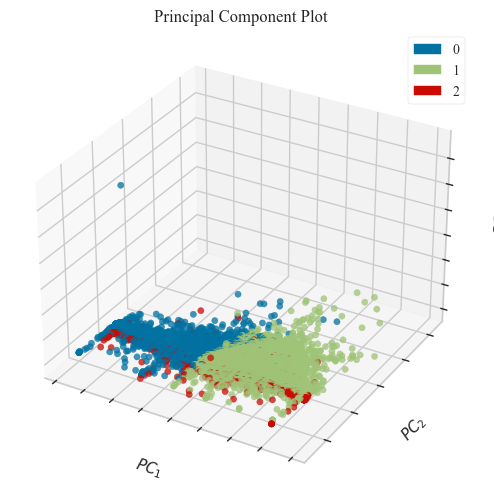

In [131]:
from yellowbrick.features import PCA
import matplotlib.pyplot as plt
classes=['0','1','2']
features=['most_frequent_app', 'frequency of use','total_usage_time','total_flow','avg_app_type','avg_start_period','avg_end_period']

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(10,6))
X=df[features]
y=labels
visualizer = PCA(scale=True, projection=3, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show(outpath="三维聚类散点图_MiniBatchKMeans.pdf")